# Numerical solution of the Fokker-Planck Equation

In [1]:
import matplotlib.pyplot as plt
import numpy as np

#### The Fokker Planck equation for the phase space probability distribution of the noisy harmonic oscillator reads
$$
\frac{\partial w(\xi_i,t)}{\partial t}=-D_i\frac{\partial w(\xi_i,t)}{\partial\xi_i}+
D_{ij}\frac{\partial^2 w(\xi_i,t)}{\partial\xi_i\partial\xi_j}
$$
with the vector $\mathbf{\xi}=(x,v)^T$

In [2]:
# 1st derivative w.r.t. x
def dx(m):
    return (np.roll(m,shift=(-1,0),axis=(1,0))-np.roll(m,shift=(1,0),axis=(1,0)))/2.
# 1st derivative w.r.t. v
def dv(m):
    return (np.roll(m,shift=(0,-1),axis=(1,0))-np.roll(m,shift=(0,1),axis=(1,0)))/2.
# 2nd derivative w.r.t. x
def d2x(m):
    return np.roll(m,shift=(-1,0),axis=(1,0))-2.0*m+np.roll(m,shift=(1,0),axis=(1,0))
# 2nd derivative w.r.t. v
def d2v(m):
    return np.roll(m,shift=(0,-1),axis=(1,0))-2.0*m+np.roll(m,shift=(0,1),axis=(1,0))
# mixed 2nd derivative
def dxdv(m):
    return np.roll(m,shift=(-1,-1),axis=(1,0))+np.roll(m,shift=(-1,1),axis=(1,0))-np.roll(m,shift=(1,1),axis=(1,0))-np.roll(m,shift=(1,-1),axis=(1,0))

#### In the case of a harmonic oscillator we have
$$
\frac{\partial w(x,v,t)}{\partial t}=-v\frac{\partial w(x,v,t)}{\partial x}+
(x+\gamma v)\frac{\partial w(x,v,t)}{\partial v}+\gamma w(x,v,t)+
c\frac{\partial^2 w(x,v,t)}{\partial v^2}
$$
In terms of finite differences with Euler forward we have
$$
w(x,v,t+\Delta t)=(1+\gamma\cdot\Delta t)\cdot w(x,v,t)-v\frac{w(x+\Delta x,v,t)-w(x-\Delta x,v,t)}{2\Delta x}
+(x+\gamma v)\frac{w(x,v+\Delta v,t)-w(x,v-\Delta v,t)}{2\Delta v}
+c\frac{w(x,v+\Delta v,t)-2\cdot w(x,v,t)+w(x,v-\Delta v,t)}{\Delta v^2}
$$

<IPython.core.display.Javascript object>


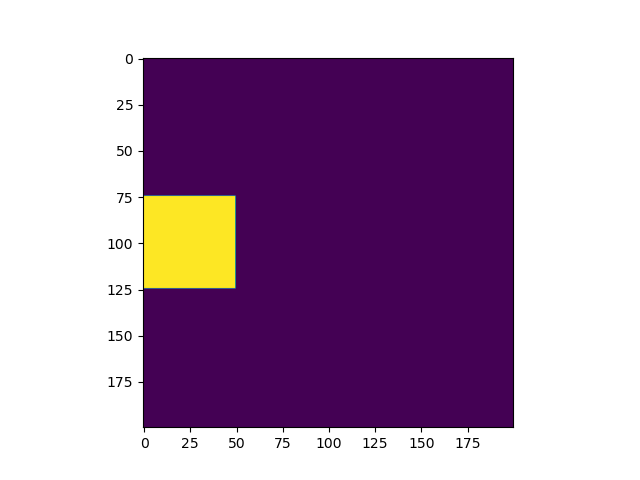

In [41]:
%matplotlib notebook
x,v=np.meshgrid(np.linspace(-1,1,200),np.linspace(-1,1,200))
wxv=np.zeros((200,200))
wxv[75:125,0:50]=100

plt.imshow(wxv)
plt.show()

In [42]:
%matplotlib notebook
dt = .1
gamma = .01
c = 1.0
k = 1.0
m = 1.0

for i in np.arange(100000):
    dwdx = (np.roll(wxv, -1, 1) - np.roll(wxv, 1, 1)) / 2.
    dwdv = (np.roll(wxv, -1, 0) - np.roll(wxv, 1, 0)) / 2.
    d2wdv2 = np.roll(wxv, -1, 0) - 2. * wxv + np.roll(wxv, 1, 0)
    wxv[1:-2,1:-2] = ((1.0 + gamma * dt) * wxv - v * dwdx * dt + (x + gamma * v) * dwdv * dt + c * d2wdv2 * dt)[1:-2,1:-2]

<IPython.core.display.Javascript object>


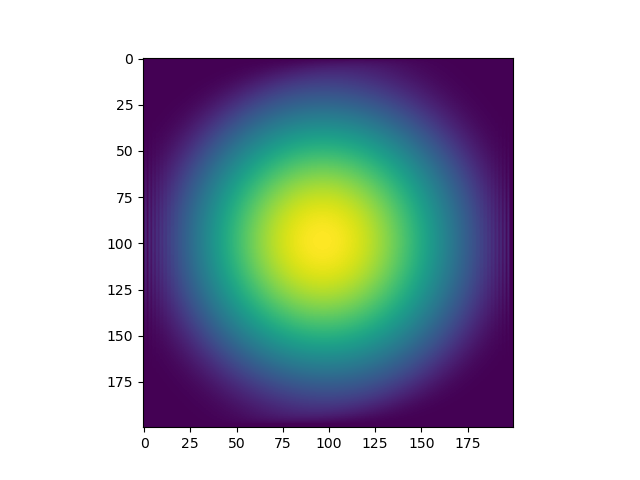

In [44]:
%matplotlib notebook
plt.imshow(wxv)
plt.show()

<IPython.core.display.Javascript object>


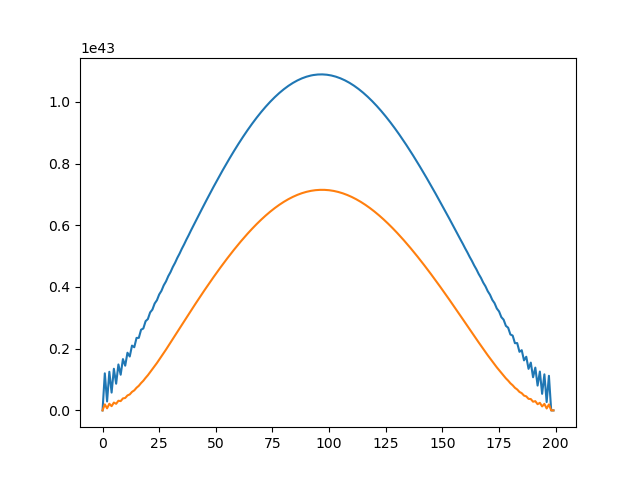

In [46]:
plt.plot(wxv[100])
plt.plot(wxv[50])